<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/LesHalles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch4 - Notebook : Statistiques bivariées : exercice 2 "Les Halles"**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Étude d'un prix d'équilibre.**



Les données sont importées depuis un fichier csv et stockées dans un dataFrame Pandas

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
url = "https://raw.githubusercontent.com/othoni-hub/ECG2/main/LesHalles.csv"
# attention : import depuis Github : copier le "raw-github-link"
df = pd.read_csv(url, sep = ",", encoding='utf-8') # le fichier importé est un fichier .csv, séparateur virgule, converti en DataFrame Pandas
df.head()

,Prix proposé xi,Demande yi,Offre zi
0,0.30,5.25,1.25
1,0.35,4.90,1.30
2,0.45,4.10,1.30
3,0.65,3.25,1.50
4,0.80,2.40,1.55


In [ ]:
Prix = df['Prix proposé xi']
Demande = df['Demande yi']
Offre = df['Offre zi']

### **Calcul du point moyen**

In [ ]:
x_bar = np.mean(Prix)
x_bar

0.5916666666666667

In [ ]:
y_bar = np.mean(Demande)
y_bar

3.641666666666666

In [ ]:
z_bar = np.mean(Offre)
z_bar

1.4166666666666667

### **1. représentation graphique : visualisation du nuage de points**

In [ ]:
import matplotlib.pyplot as plt     # matplotlib.pyplot permet de réaliser des graphiques

In [ ]:
def centrax(xmin, xmax, ymin, ymax, titre, legende = [], axe_x = "", axe_y = ""):
    '''Cette procédure ajuste les paramètres graphiques : fenêtre (xmin, xmax, ymin, ymax), titre, légende (vide par défaut)'''
    # ajustement des paramètres des axes (centrage, couleur, etc.)
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.legend(legende, loc = 'best')

    plt.xlim(xmin,xmax)   
    plt.ylim(ymin,ymax)         # fenêtre d'affichage
    plt.title(titre)            # titre du graphique au format LaTeX (encadré par des $)
    plt.xlabel(axe_x)           # nom des axes
    plt.ylabel(axe_y)

    plt.show()

In [ ]:
# paramètres graphiques
xmin = 0.2
xmax = 1.2
ymin = 1
ymax = max(max(Demande), max(Offre))+0.5
titre = "Offre et demande en fonction du prix proposé"
axe_x = "Prix (€/kg)"
axe_y = "Quantités (tonnes)"



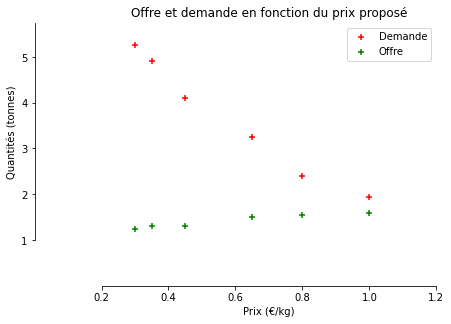

In [ ]:
plt.scatter(Prix,Demande,marker ='+',color = 'red')     # représentation graphique du nuage de points y
plt.scatter(Prix,Offre,marker ='+',color = 'green')     # représentation graphique du nuage de points z
#plt.scatter(x_bar,y_bar,marker = "v", color = "blue")   # placement du point moyen
legende=['Demande', 'Offre']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

* **Observation du graphique :**

    * L'offre semble pouvoir être ajustée par une fonction affine (ajustement linéaire).

    * Par contre, la courbe de demande semble un peu incurvée, un ajustement exponentiel est peut-être plus adapté.

### **2. Ajustement de l'offre**

* 2.1.  Compte tenu du relatif alignement du nuage de points, un ajustement linéaire paraît adapté.

* 2.2 Calcul des éléments nécessaire à la régression linéaire
    * Fonctions de calcul des éléments caractéristiques

In [ ]:
def covariance_empirique(x,y) :
    '''Cette fonction reçoit deux listes x et y, de même taille, 
    et renvoie la covariance de ces deux listes
    Remarque : si x = y, on obtient la variance de x.'''
    xbar = np.mean(x)
    ybar = np.mean(y)
    n = len(x)

    s_XY = 1/n * sum([(x[k] - xbar)*(y[k] - ybar) for k in range(n)])
    return s_XY

* Calcul de l'équation de la droite d'ajustement linéaire par la méthode des moindres carrés

In [ ]:
def coeff_droite_regression(x,y):
    '''Cette fonction reçoit deux listes x et y de même taille,
    et renvoie les coefficients de la droite d'ajustemennt de y en x'''
    xbar = np.mean(x)
    ybar = np.mean(y)

    # pente
    a = covariance_empirique(x, y) / covariance_empirique(x, x)
    # ordonnée à l'origine
    b = ybar - a * xbar
    return a, b

In [ ]:
a,b = coeff_droite_regression(Prix, Offre)
print('Équation de la droite de régression de z en x : z=' + str(a) + '.x + ' + str(b))

Équation de la droite de régression de z en x : z=0.532596685082873.x + 1.101546961325967


* On calcule les offres ajustées.

In [ ]:
def y_ajuste(xx,a,b):
    '''Cette fonction reçoit une liste xx, les coeeficients caractéristiques de la droite de régression
    et renvoie la liste des ordonnées ajustées sur cette droite'''
    yy = [a*x + b for x in xx]
    return yy

In [ ]:
offres_ajustees = y_ajuste(Prix,a,b)
offres_ajustees

[1.2613259668508288,
 1.2879558011049725,
 1.3412154696132599,
 1.4477348066298343,
 1.5276243093922655,
 1.63414364640884]

In [ ]:
Offre

0    1.25
1    1.30
2    1.30
3    1.50
4    1.55
5    1.60
Name: Offre zi, dtype: float64

* Résidus

In [ ]:
def residus(y_reels,y_ajustes) :
    from math import sqrt 
    '''Cette fonction reçoit deux listes : y_reels et y_ajustes, 
    et renvoie le "résidu" d'ajustement de la 1ère par la 2nde'''
    res = sqrt(sum([(y_reels[k] - y_ajustes[k])**2 for k in range(len(y_reels))]))
    return res

In [ ]:
residus(Offre,offres_ajustees)

0.0798133180982745

### **3. Ajustement de la demande**

* 3.1.  Le nuage de points est plutôt incurvé, en forme d'exponentielle négative, un ajustement exponentiel pourrait être approprié.
Cela consiste en un ajustement linéaire du **logarithme** de la série y par rapport au prix x.

In [ ]:
from math import log, exp
log_Demande = [log(y) for y in Demande]
# log_Demande V

* 2.2 Calcul des éléments nécessaires à la régression linéaire

In [ ]:
a2,b2 = coeff_droite_regression(Prix, log_Demande)
print('Équation de la droite de régression de Y en x : Y = ' + str(a2) + '.x + ' + str(b2))
print('...et donc, équation de la courbe d''ajustement de y en x : y = exp('+ str(a2) + '.x + ' + str(b2)+')')

Équation de la droite de régression de Y en x : Y = -1.442025182721167.x + 2.0832654600602867
...et donc, équation de la courbe dajustement de y en x : y = exp(-1.442025182721167.x + 2.0832654600602867)


* On calcule les ajustements des logarithmes des demandes

In [ ]:
log_Demande_ajustes = y_ajuste(Prix,a2,b2)
# log_Demande_ajustes V

[1.6506579052439365,
 1.5785566461078782,
 1.4343541278357614,
 1.145949091291528,
 0.9296453138833531,
 0.6412402773391197]

* On revient à l'ajustement logarithmique de la demande (par composition par l'exponentielle)

In [ ]:
demandes_ajustees = [exp(Y) for Y in log_Demande_ajustes]
# demandes_ajustees V

[5.21040665365317,
 4.847953446532031,
 4.19693345073126,
 3.1454252363281157,
 2.5336103818046602,
 1.8988345008336383]

In [ ]:
# Demande V

0    5.25
1    4.90
2    4.10
3    3.25
4    2.40
5    1.95
Name: Demande yi, dtype: float64

* Résidus

In [ ]:
residus(Demande,demandes_ajustees)

0.21231602459886162

### **4. Étude graphique du prix d'équilibre**

* **Graphiques**

In [ ]:
xx = np.arange(xmin, xmax, 0.05)
zz = [a * x + b for x in xx]
yy = [exp(a2 * x + b2) for x in xx]


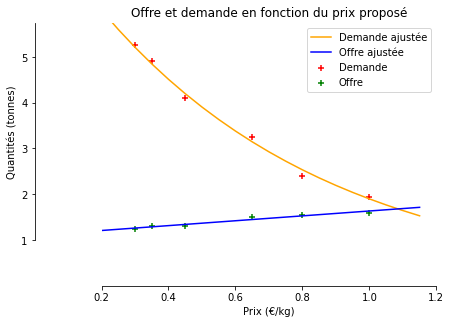

In [ ]:
plt.scatter(Prix,Demande,marker ='+',color = 'red')     # représentation graphique du nuage de points y
plt.plot(xx,yy, color = 'orange')                          # ajustement de la demande
plt.scatter(Prix,Offre,marker ='+',color = 'green')     # représentation graphique du nuage de points z
plt.plot(xx,zz, color = 'blue')                        # ajustement de l'offre
#plt.scatter(x_bar,y_bar,marker = "v", color = "blue")   # placement du point moyen

legende=[ 'Demande ajustée', 'Offre ajustée','Demande','Offre']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

* **prix d'équilibre**

Au vu du graphique, le prix d'équilibre (le prix proposé qui équilibre offre et demande) se situe aux environs de 1,10 €, pour des quantités de 1,7 tonnes environ.

### **5. Étude numérique du point d'équilibre**

* **existence et unicité**

On considère la fonction $h$, définie sur $I = [0,2]$ par $h(x) = e^{-1.44 x + 2.08} - \left(0.53  x + 1.10 \right )$.

Montrons que l'équation $h(x) = 0$ admet une solution unique sur $I$.

$h$ est continue et dérivable sur $I$ et $h'(x) = -1.44 . e^{-1.44 x + 2.08} - 0.53$
$\left(* \right)h'(x) \geqslant 0 \Leftrightarrow -1.44 . e^{-1.44 x + 2.08} \geqslant - 0.53 \Leftrightarrow e^{-1.44 x + 2.08} \leqslant  \frac{0.53}{1.44}$

$\left(* \right) \Leftrightarrow -1.44 x + 2.08 \leqslant  \ln \left(\frac{0.53}{1.44} \right ) \Leftrightarrow -1.44 x  \leqslant \ln \left(\frac{0.53}{1.44} \right ) - 2.08$

$\left(* \right) \Leftrightarrow x  \geqslant \left(\ln \left(\frac{0.53}{1.44} \right ) - 2.08 \right ) *(-1.44) \Rightarrow x \geqslant 4$

Ainsi, sur $I$, $h$ est strictement décroissante.

In [127]:
def h(x) :
    y = exp(a2*x+b2)-(a*x+b)
    return y

h(0)

6.929102949748993

In [128]:
h(2)

-1.7177639097224442

$h(0) \geqslant 0$, $h(2) \leqslant 0$.
Ainsi, $h$ est continue, strictement décroissante sur $I$, et change de signe sur $I$, donc d'après le corollaire du Théorème des Valeurs Intermédiaires (TVI), 

**l'équation $h(x) = 0$ admet sur $I$ une unique solution $\alpha$.**

* **Recherche de $\alpha$ par dichotomie**

In [133]:
# précision souhaitée
nb_decimales = 2
epsilon = 10**(-nb_decimales)

#intervalle d'étude [1 ; 3]
aa = 0
bb = 2


In [147]:
compteur = 0
u = aa
v = bb
while v-u > epsilon :
    compteur = compteur + 1
    c = (u+v)/2
    if h(u)*h(c) < 0 :
        v = c
    else :
        u = c
cc = round(c,nb_decimales)        
print('Une valeur approchée de la solution à ',epsilon,'près est : ',cc,'   après ',compteur,' itérations.')

Une valeur approchée de la solution à  0.01 près est :  1.09    après  8  itérations.


In [151]:
q = round(a*c + b,nb_decimales)
q

1.68

In [152]:
 qq = round(exp(a2*c+b2),nb_decimales)
 qq

1.68

In [155]:
print('Le prix d''équilibre est : '+ str(cc) +'€/kg, correspondant à une offre et une demande égales, de : '+str(qq)+ ' tonnes.')

Le prix déquilibre est : 1.09€/kg, correspondant à une offre et une demande égales, de : 1.68 tonnes.
